In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. Read the dataset to the python environment

In [2]:
data = pd.read_excel('iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [8]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

# 2. Do necessary pre-processing steps.

In [9]:
#Preprocessing the dataset

In [10]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

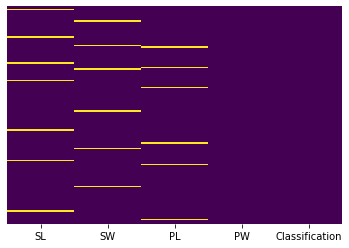

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='SL', ylabel='Density'>

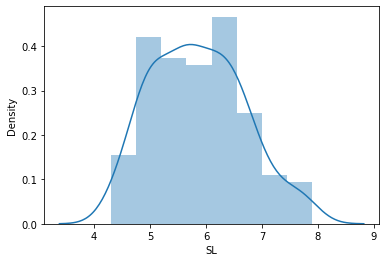

In [12]:
sns.distplot(data.SL)

In [13]:
#Fills null values with median as there is not much skew in the graph

In [14]:
data['SL'] = data['SL'].fillna(data['SL'].median())

In [15]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='SW', ylabel='Density'>

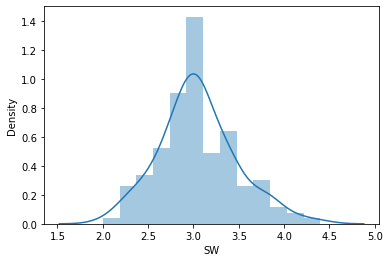

In [16]:
sns.distplot(data.SW)

In [17]:
#Fills null values with median as there is not much skew in the graph

In [18]:
data['SW'] = data['SW'].fillna(data['SW'].median())

<AxesSubplot:xlabel='SL', ylabel='Density'>

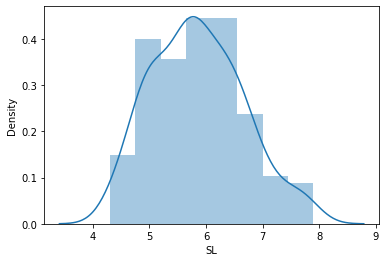

In [19]:
sns.distplot(data.SL)

In [20]:
#Fills null values with median as there is not much skew in the graph

In [21]:
data['PL'] = data['PL'].fillna(data['PL'].median())

In [22]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of SL')

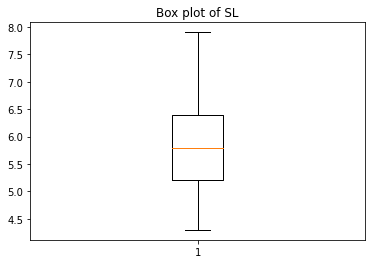

In [23]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

In [24]:
#Their is no outliers

Text(0.5, 1.0, 'Box plot of SW')

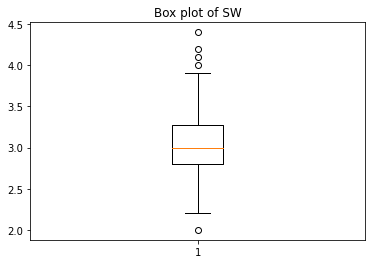

In [25]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [26]:
#Their are outliers

In [27]:
Q1 = np.percentile(data['SW'],25, interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75, interpolation = 'midpoint')

In [28]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [29]:
data['SW'].median()

3.0

In [30]:
IQR = Q3-Q1

In [31]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [32]:
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [33]:
# creating a foreloop

In [34]:
outlier = []
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [35]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [36]:
ind1 = data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [37]:
data.drop([14, 15, 32, 33],inplace = True)

Text(0.5, 1.0, 'Box plot of SW')

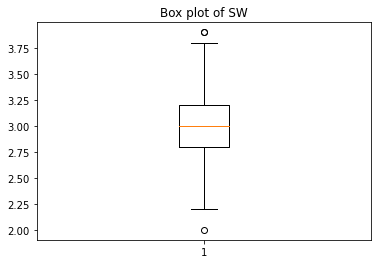

In [38]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

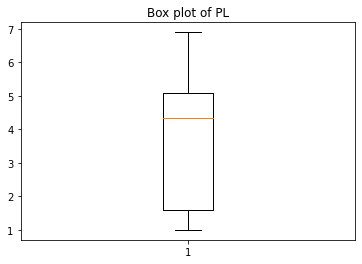

In [39]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

In [40]:
#Their is no outliers

Text(0.5, 1.0, 'Box plot of PW')

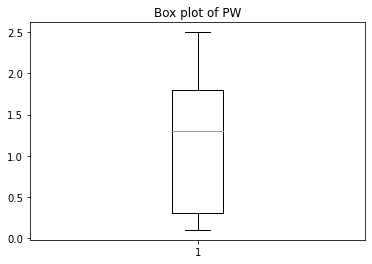

In [41]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

In [42]:
#Their is no outliers

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [43]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [44]:
x = data[['SL', 'SW', 'PL', 'PW']]
y = data['Classification']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42,shuffle =True)

In [46]:
x_train.shape

(102, 4)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

# SVM

In [48]:
from sklearn.svm import SVC

# Linear SVM

In [49]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
print('Accuracy using linear svm is', accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy using linear svm is 0.9772727272727273
F - score of the model:  0.9740259740259741


# Polynomial SVM

In [50]:
svm_pol = SVC(kernel='poly')
svm_pol.fit(x_train,y_train)
y_pred = svm_pol.predict(x_test)
print('Accuracy using poly svm is', accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy using poly svm is 0.9545454545454546
F - score of the model:  0.9494949494949495


# Radial SVM

In [51]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred = svm_radial.predict(x_test)
print('Accuracy using radial svm is', accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy using radial svm is 0.9090909090909091
F - score of the model:  0.904134179996249


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
print('Accuracy on Decision tree model is',accuracy_score(y_test,y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy on Decision tree model is 0.9545454545454546
F - score of the model:  0.9488636363636364


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy')
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

[[17  0  0]
 [ 0 10  1]
 [ 0  1 15]]
ACCURACY of the model:  0.9545454545454546
F - score of the model:  0.9488636363636364


# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.9318181818181818
F - score of the model:  0.9255873956960913


In [56]:
confusion_matrix(y_test,y_pred)

array([[16,  1,  0],
       [ 0, 10,  1],
       [ 0,  1, 15]], dtype=int64)

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [58]:
acc_values

[0.9772727272727273,
 0.9545454545454546,
 0.9545454545454546,
 0.9318181818181818,
 0.9318181818181818,
 0.9090909090909091,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9545454545454546,
 0.9318181818181818]

Text(0, 0.5, 'accuracy')

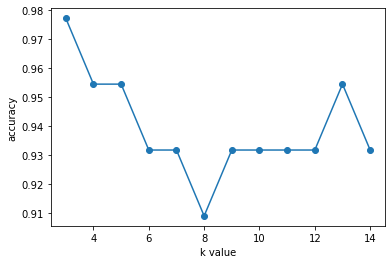

In [59]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [69]:
#substituting the value

In [66]:
    classifier = KNeighborsClassifier(n_neighbors=2,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)

In [67]:
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.9772727272727273
F - score of the model:  0.9747545582047685


In [68]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 15]], dtype=int64)

In [ ]:
# From the above tests , it is found that KNN classifiers give the best results in predicting the series as it has the Highest ACCURACY score and F score.